In [37]:
import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [38]:
img  = cv2.imread('./test_images/virat-kohli.png')
img.shape

(300, 300, 3)

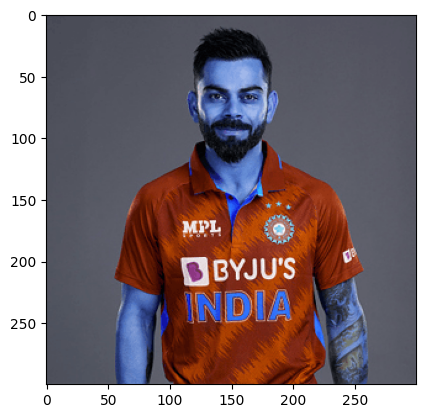

In [39]:
plt.imshow(img)

In [40]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
gray.shape

(300, 300)

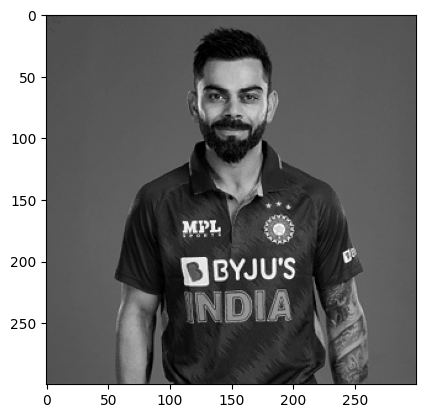

In [41]:
plt.imshow(gray,cmap='gray')

In [42]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.1,5)
faces

array([[113,  36,  78,  78]], dtype=int32)

In [43]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(113), np.int32(36), np.int32(78), np.int32(78))

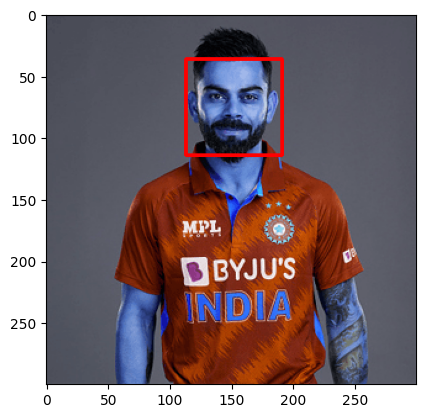

In [44]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

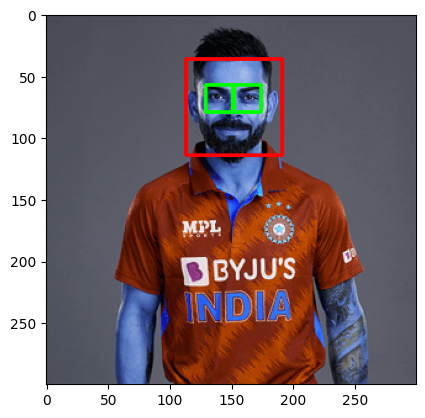

In [45]:
# reducing the dimensions of gray and normal image to detect eyes
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

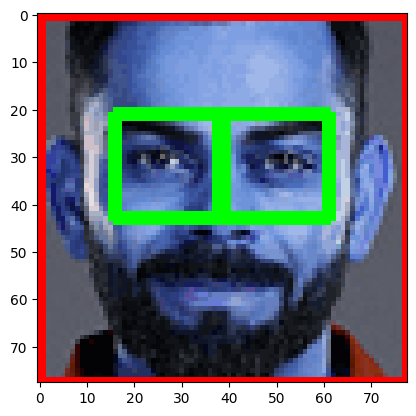

In [46]:
plt.imshow(roi_color,cmap='gray')

In [47]:
# Function to get cropped images of players
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.1,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

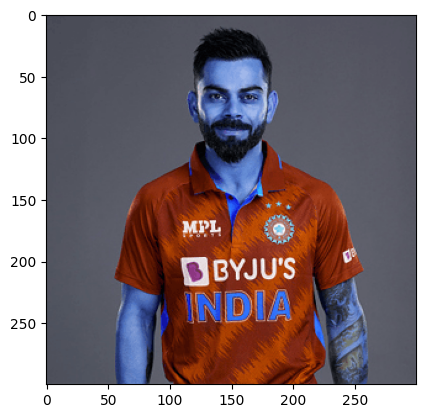

In [48]:
original_image = cv2.imread('./test_images/virat-kohli.png')
plt.imshow(original_image)

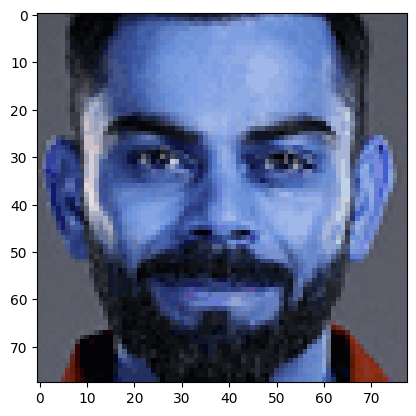

In [49]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/virat-kohli.png')
plt.imshow(cropped_image)

In [50]:
path_to_data = "./Datasets/"
path_to_cr_data = "./Datasets/cropped/"

In [51]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [52]:
img_dirs

['./Datasets/virat_kohli',
 './Datasets/lebron_james',
 './Datasets/ronaldo',
 './Datasets/maria_sharapova',
 './Datasets/cropped',
 './Datasets/roger_federer']

In [53]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)  # Delete the directory and all its contents
os.mkdir(path_to_cr_data)            # Recreate the empty directory

In [57]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

valid_extensions = ('.jpg', '.jpeg', '.png')  # Acceptable image formats

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1].strip()  # Strip trailing spaces

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        if not entry.name.lower().endswith(valid_extensions):
            continue  # Skip non-image files

        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = os.path.join(path_to_cr_data, celebrity_name)

            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped image in folder:", cropped_folder)

            cropped_file_name = f"{celebrity_name}{count}.png"
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1



Generating cropped image in folder: ./Datasets/cropped/lebron_james
Generating cropped image in folder: ./Datasets/cropped/ronaldo
Generating cropped image in folder: ./Datasets/cropped/maria_sharapova
Generating cropped image in folder: ./Datasets/cropped/roger_federer
